In [1]:
from bs4 import BeautifulSoup
import requests
from pprint import pprint
import pandas as pd

In [2]:
req_headers = {
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8',
    'accept-encoding': 'gzip, deflate, br',
    'accept-language': 'en-US,en;q=0.8',
    'upgrade-insecure-requests': '1',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) '
                  'Chrome/61.0.3163.100 Safari/537.36'
}

city = 'los-angeles-ca'  # Need better locations, gps coords and ranges?

### Multipage loop

### Dev - single page

In [3]:
def parse_house_attributes(_raw_input: list):
    _raw_input = [i for i in _raw_input if ';' in i]
    for a in _raw_input:
        if a.endswith(';bds'):
            _bed = int(a.split(';')[0])
        elif a.endswith(';ba'):
            _bath = int(a.split(';')[0])
        elif a.endswith(';sqft'):
            _sqft = int(a.split(';')[0].replace(',', ''))
    return _bed, _bath, _sqft

In [39]:
pages = 3

beds = []
baths = []
sqfts = []
urls = []
prices = []
addresses = []

with requests.Session() as session:
    for i in range(1, pages+1):
        url = f'https://www.zillow.com/homes/for_sale/{city}/3-_beds/2.0-_baths/{i}_p/'
        response = session.get(url, headers=req_headers)
        soup = BeautifulSoup(response.text, "html.parser")

        prices.extend(list(soup.find_all(class_='list-card-price')))
        addresses.extend(soup.find_all(class_='list-card-addr'))
        house_attrs = list(soup.find_all("ul", class_="list-card-details"))
#         broker = soup.find_all('div', {'class': 'list-card-footer'})  # Broker

        # Create url list by looping through url, pull href and strip out address tag
        for link in soup.find_all("article"):
            href = link.find('a', class_="list-card-link")
            if href is not None:
                _ = href.find('address').extract()
                urls.append(href)

        # Parsing house attributes and assigning to lists
        for house in house_attrs:
            raw_input = []
            for b in house.children:
                raw_input.append(b.get_text(';', strip=True))
            bed, bath, sqft = parse_house_attributes(raw_input)
            beds.append(bed)
            baths.append(bath)
            sqfts.append(sqft)

In [40]:
df = pd.DataFrame()

df['price'] = prices
df['address'] = addresses
df['links'] = urls
df['beds'] = beds
df['baths'] = baths
df['sqft'] = sqfts

df['price'] = df['price'].astype('str')
df['address'] = df['address'].astype('str')
df['beds'] = df['beds'].astype('str')
df['links'] = df['links'].astype('str')

df

,price,address,links,beds,baths,sqft
0,"<div class=""list-card-price"">$999,900</div>","<address class=""list-card-addr"">11564 Viking A...","<a class=""list-card-link list-card-link-top-ma...",5,3,1957
1,"<div class=""list-card-price"">$821,200</div>","<address class=""list-card-addr"">10415 Gothic A...","<a class=""list-card-link list-card-link-top-ma...",4,2,1303
2,"<div class=""list-card-price"">$854,300</div>","<address class=""list-card-addr"">18834 Communit...","<a class=""list-card-link list-card-link-top-ma...",3,2,1208
3,"<div class=""list-card-price"">$935,900</div>","<address class=""list-card-addr"">303 N Harbor V...","<a class=""list-card-link list-card-link-top-ma...",3,3,1363
4,"<div class=""list-card-price"">$1,153,900</div>","<address class=""list-card-addr"">7613 Midfield ...","<a class=""list-card-link list-card-link-top-ma...",3,2,1251
5,"<div class=""list-card-price"">$885,100</div>","<address class=""list-card-addr"">18349 Delano S...","<a class=""list-card-link list-card-link-top-ma...",3,2,1081
6,"<div class=""list-card-price"">$955,900</div>","<address class=""list-card-addr"">8701 Topanga C...","<a class=""list-card-link list-card-link-top-ma...",4,3,2165
7,"<div class=""list-card-price"">$1,269,900</div>","<address class=""list-card-addr"">5208 Woodman A...","<a class=""list-card-link list-card-link-top-ma...",4,3,1945
8,"<div class=""list-card-price"">$3,950</div>","<address class=""list-card-addr"">4919 Elmwood A...","<a class=""list-card-link list-card-link-top-ma...",3,2,1620
9,"<div class=""list-card-price"">$3,725,000</div>","<address class=""list-card-addr"">5173 Collett A...","<a class=""list-card-link list-card-link-top-ma...",5,6,4864


#### Remove HTML tags

In [41]:
df['price'] = df['price'].replace('<div class="list-card-price">', '', regex=True)
df['price'] = df['price'].replace('</div>', '', regex=True)
df['price'] = df['price'].str.replace(r'\D', '', regex=True)

df['address'] = df['address'].replace('<address class="list-card-addr">', '', regex=True)
df['address'] = df['address'].replace('</address>', '', regex=True)

df['links'] = df['links'].replace('<a class="list-card-link list-card-link-top-margin" href="', '', regex=True)
df['links'] = df['links'].replace('" tabindex="0"></a>', '', regex=True)

In [42]:
df

,price,address,links,beds,baths,sqft
0,999900,"11564 Viking Ave, Porter Ranch, CA 91326",https://www.zillow.com/homedetails/11564-Vikin...,5,3,1957
1,821200,"10415 Gothic Ave, Granada Hills, CA 91344",https://www.zillow.com/homedetails/10415-Gothi...,4,2,1303
2,854300,"18834 Community St, Northridge, CA 91324",https://www.zillow.com/homedetails/18834-Commu...,3,2,1208
3,935900,"303 N Harbor View Ave, San Pedro, CA 90732",https://www.zillow.com/homedetails/303-N-Harbo...,3,3,1363
4,1153900,"7613 Midfield Ave, Los Angeles, CA 90045",https://www.zillow.com/homedetails/7613-Midfie...,3,2,1251
5,885100,"18349 Delano St, Reseda, CA 91335",https://www.zillow.com/homedetails/18349-Delan...,3,2,1081
6,955900,"8701 Topanga Canyon Blvd, Canoga Park, CA 91304",https://www.zillow.com/homedetails/8701-Topang...,4,3,2165
7,1269900,"5208 Woodman Ave, Van Nuys, CA 91401",https://www.zillow.com/homedetails/5208-Woodma...,4,3,1945
8,3950,"4919 Elmwood Ave, Los Angeles, CA 90004",https://www.zillow.com/homedetails/4919-Elmwoo...,3,2,1620
9,3725000,"5173 Collett Ave, Encino, CA 91436",https://www.zillow.com/homedetails/5173-Collet...,5,6,4864


## Home specific links

<!DOCTYPE html>
<html class="no-js zsg-theme-modernized null" itemscope="" itemtype="http://schema.org/Organization" lang="en" xmlns="http://www.w3.org/1999/xhtml" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#" xmlns:product="http://ogp.me/ns/product#">
<head>
<title>7904 Topanga Canyon Blvd UNIT 7, Canoga Park, CA 91304 | MLS #123236 | Zillow</title><meta content="7904 Topanga Canyon Blvd Unit 7, Canoga Park, CA 91304-4753 is a townhouse unit listed for-sale at $573,900. The 1,626 sq. ft. townhouse is a 3 bed, 3.0 bath unit. Find 27 photos of the 7904 Topanga Canyon Blvd UNIT 7 townhouse on Zillow. View more property details, sales history and Zestimate data on Zillow. MLS # 123236" name="description"/><meta content="Zillow, Inc." name="author"/><meta content="Copyright (c) 2006-2021 Zillow, Inc." name="Copyright"/><script>
        if (typeof Object.assign === 'function') {
            window.appInfo = Object.assign(
                typeof window.appInfo ===
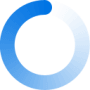
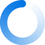

In [48]:
home_url = "https://www.zillow.com/homedetails/7904-Topanga-Canyon-Blvd-UNIT-7-Canoga-Park-CA-91304/19910414_zpid/"
with requests.Session() as session:
    response = session.get(home_url, headers=req_headers)
    soup = BeautifulSoup(response.text, "html.parser")
    pprint(soup)